# Tilemapbase

Une question assez naturelle est : peut-on utiliser des fonds de carte avec `matplotlib` ? Bien entendu, la réponse est positive. Pour cela, on peut utiliser la bibliothèques tilemapbase.

Attention, tilemapbase repose sur Openstreet map. En fonction de la nature de votre projet, les politiques d'utilisation d'openstreetmap ne seront pas forcément compatibles.

Le focntionnement de tilemapbase est relativement simple. Tout d'abord il est nécessaire d'importer les modules et d'indiquer que l'on souhaite utiliser les Openstreetmap comme source des "tiles", c'est à dire le fond de carte.

In [15]:
import matplotlib.pyplot as plt
import tilemapbase
tilemapbase.init(create=True)
fond_carte = tilemapbase.tiles.build_OSM()

Tilemapbase nécessite de définir l'espace sur lequel seront représentées les données. On utilise pour cela la fonction `tilemapbase.Extent.from_lonlat`. Elle prend en paramètre, dans l'ordre, la longitude min, la longitude max, la latitude min et la latitude max.

On peut choisir de forcer le ratio d'aspect. Ici, on demande qu'il soit carré.

In [5]:
extent = tilemapbase.Extent.from_lonlat(-7.3, 11.5, 41, 52)
extent = extent.to_aspect(1.0)
extent

Extent((0.4835278680034443,0.330315093621797)->(0.5281387986632224,0.37492602428157507) projected as normal)

À partir de cet `extent`, on peut créer un graphe.

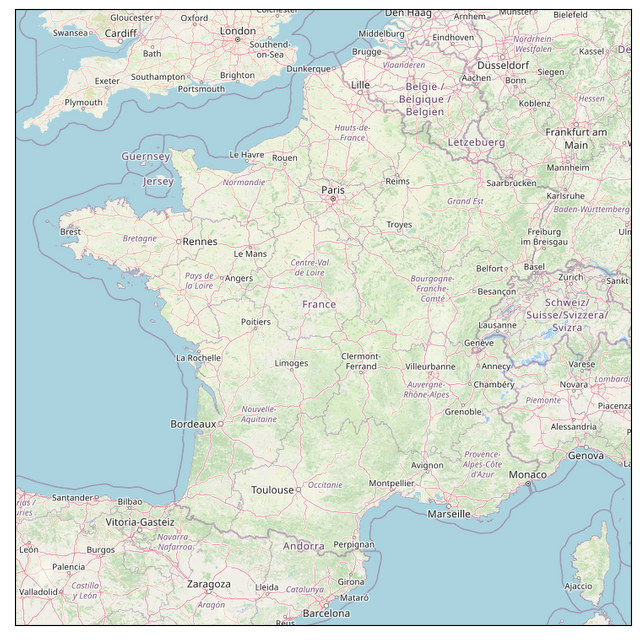

In [8]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, fond_carte, width=600)
plotter.plot(ax, fond_carte)


On peut maintenant ajouter des marqueurs sur la carte. L'astuce est de convertir les coordonnées (lon, lat) de nos marqueur en coordonnées x, y compatible avec matplotlib.

In [9]:
lon = [2.3424346745212903, 5.399212549333288, 4.840265609427432, 1.4388269132731253,  7.258872036700144, -1.5553965640676033,3.864199673082997,  7.749300150221324, -0.5809870763075933, 3.0565319168675664]
lat = [48.859822979631595, 43.3006443339931, 45.757556691319834, 43.59682994774006, 43.706993704948886, 47.22695145891068, 43.61358641589052, 48.57698670737203, 44.84332596104577, 50.63004742852798]

X = []
Y = []
for i in range(len(lon)):
    x, y = tilemapbase.project(lon[i], lat[i])
    X.append(x)
    Y.append(y)

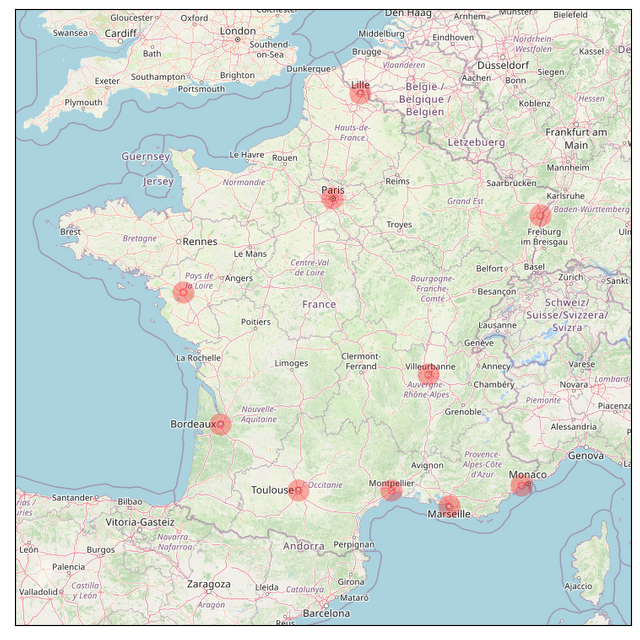

In [17]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, fond_carte, width=600)
plotter.plot(ax, fond_carte)

ax.scatter(X,Y, marker="o", color="red", linewidth=10, alpha=0.3)
#fig.savefig("test.pdf", dpi=200) 

On peut également changer le fond de carte et prendre celui qui nous convient le mieux. On peut trouver la liste à la fin de ce fichier : [sources](https://github.com/MatthewDaws/TileMapBase/blob/master/tilemapbase/tiles.py)

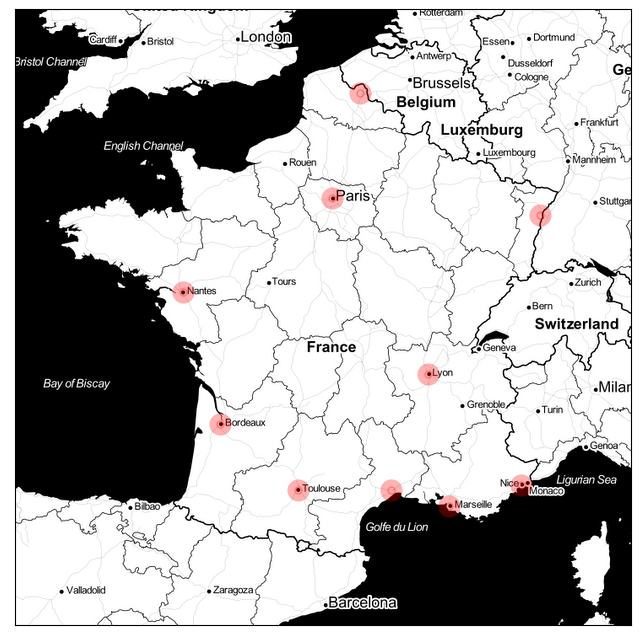

In [13]:
t = tilemapbase.tiles.Stamen_Toner

fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, t, width=600)
plotter.plot(ax, t)

ax.scatter(X,Y, marker="o", color="red", linewidth=10, alpha=0.3)
#fig.savefig("test.pdf", dpi=200) 

## Exercice

Vous devriez pouvoir utiliser ce que nous venons de voir pour adapter une des cartes que nous avons réalisées (métro ou villes) en utilisant `matplotlib` et `tilemapbase`.